In [1]:
# from fastbook import *
from sklearn import datasets
import seaborn as sns
import sklearn
import torch
from torch.utils.data import DataLoader
from torch.nn import functional as F


from mean_classifier import MeanClassifier
from sgd import SGDRegressor, SGDClassifier
import utils

# Mean Classifier

In [2]:
X_train, X_test, y_train, y_test = utils.load_mnist()

In [3]:
clf = MeanClassifier(loss='mae')
clf.fit(X_test, y_test)
clf.score(X_test, y_test)

0.9524043202400208

In [4]:
clf = MeanClassifier(loss='mse')
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9661432504653931

# Gradient Descent

<AxesSubplot:>

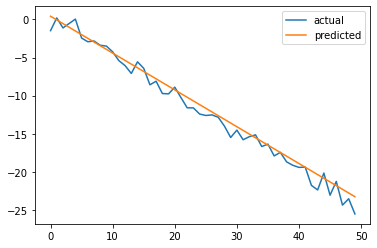

In [5]:
M_TRUE = -0.5
C_TRUE = 0

X = torch.tensor(range(50)).reshape(50, 1).float()
y = ((X * M_TRUE) + C_TRUE + torch.randn(50).reshape((-1, 1))).reshape(50,1)
train_dl = DataLoader(list(zip(X, y)), batch_size=5, shuffle=True)

g = SGDRegressor(epochs=50, loss=F.mse_loss, lr=1e-3)
g.fit(train_dl)
sns.lineplot(x=X.reshape(-1), y=y.reshape(-1), label='actual')
sns.lineplot(x=X.reshape(-1), y=g.predict(X).reshape(-1).detach().numpy(), label='predicted')

<AxesSubplot:>

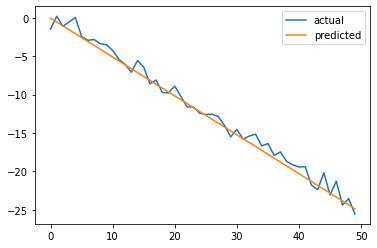

In [6]:
g = SGDRegressor(epochs=50, loss=F.mse_loss, lr=1e-3)
g.fit(train_dl)
sns.lineplot(x=X.reshape(-1), y=y.reshape(-1), label='actual')
sns.lineplot(x=X.reshape(-1), y=g.predict(X).reshape(-1).detach().numpy(), label='predicted')

# Classifier

In [7]:
train_dl = DataLoader(list(zip(X_train, y_train)), batch_size=25, shuffle=True)
test_dl = DataLoader(list(zip(X_test, y_test)), batch_size=256)

In [8]:
clf = SGDClassifier(epochs=10)
clf.fit(train_dl)
clf.score(X_test, y_test)

0.982826292514801

In [9]:
# trying with pytorch's SGD:
clf = SGDClassifier(epochs=10, optimiser=torch.optim.SGD)
clf.fit(train_dl)
clf.score(X_test, y_test)

0.9852796792984009

In [10]:
from fastai.vision.all import DataLoaders, Learner
import fastai


def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

def sigmoid_loss(preds, y_true):
    proba = preds.sigmoid()
    return torch.where(y_true == 1, 1 - proba, proba).mean()


dls = DataLoaders(train_dl, test_dl)
learn = Learner(dls, torch.nn.Linear(28*28,1), opt_func=fastai.optimizer.SGD, loss_func=sigmoid_loss, metrics=batch_accuracy)
learn.fit(10, lr=1)


epoch,train_loss,valid_loss,batch_accuracy,time
0,0.022455,0.024346,0.979882,00:00
1,0.017549,0.021440,0.981845,00:00
2,0.012636,0.020543,0.982826,00:00
3,0.014693,0.019871,0.981845,00:00
4,0.013889,0.017743,0.986752,00:00
5,0.012592,0.019654,0.982336,00:00
6,0.011514,0.018043,0.983317,00:00
7,0.017693,0.017517,0.983317,00:00
8,0.014893,0.017161,0.984789,00:00
9,0.008846,0.017309,0.983317,00:00


# Moving to Neural Networks

In [1]:
def simple_net(xb):
    res = xb@w1 + b1
    res = F.relu(res)
    res = res@w2 + b2
    return res

In [7]:
import torch
from torch import nn

def init_params(size, std=1.0):
    return (torch.randn(size)).requires_grad_()

In [8]:
w1 = init_params((28*28, 30))
b1 = init_params(30)
w2 = init_params((30, 1))
b2 = init_params(1)

In [11]:
simple_net = nn.Sequential(
    nn.Linear(28*28, 30),
    nn.ReLU(),
    nn.Linear(30, 1)
)